In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
coverage_data=pd.read_csv('C:/Users/saisenthur/OneDrive/Desktop/Guvi/Project/Vaccination Analysis/data_clean/coverage.csv')
incidence_rate_data = pd.read_csv('C:/Users/saisenthur/OneDrive/Desktop/Guvi/Project/Vaccination Analysis/data_clean/incidence-rate.csv')
reported_cases_data = pd.read_csv('C:/Users/saisenthur/OneDrive/Desktop/Guvi/Project/Vaccination Analysis/data_clean/reported-cases.csv')
vaccine_intro_data = pd.read_csv('C:/Users/saisenthur/OneDrive/Desktop/Guvi/Project/Vaccination Analysis/data_clean/vaccine-introduction.csv')
vaccine_schedule_data = pd.read_csv('C:/Users/saisenthur/OneDrive/Desktop/Guvi/Project/Vaccination Analysis/data_clean/vaccine-schedule.csv')

In [4]:
#Average Coverage by Year
coverage_year=coverage_data.groupby('YEAR')['COVERAGE'].mean().reset_index()
coverage_year

,YEAR,COVERAGE
0,1980-01-01,25.752162
1,1981-01-01,30.820770
2,1982-01-01,34.508478
3,1983-01-01,41.847500
4,1984-01-01,46.010728
5,1985-01-01,50.736990
6,1986-01-01,52.265884
7,1987-01-01,56.543837
8,1988-01-01,61.572588
9,1989-01-01,62.890569


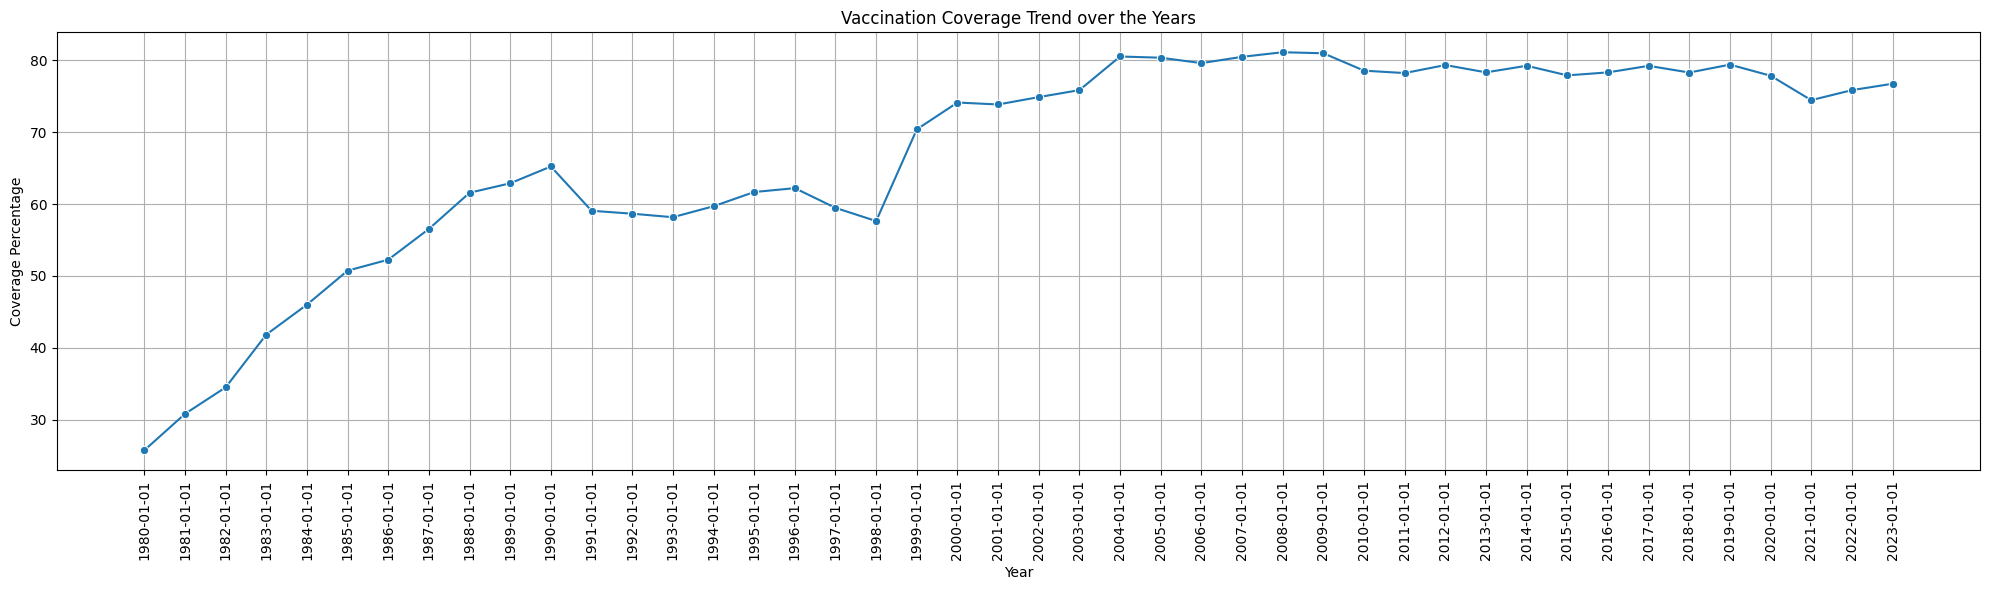

In [6]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=coverage_year, x='YEAR', y='COVERAGE', marker='o')
plt.xticks(rotation=90)
plt.title("Vaccination Coverage Trend over the Years")
plt.xlabel("Year")
plt.ylabel("Coverage Percentage")
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
#Total coverage of each vaccine
#coverage['ANTIGEN'].nunique()

coverage_total=coverage_data.groupby('ANTIGEN')['COVERAGE'].mean().reset_index()
coverage_total.sort_values(by='COVERAGE', ascending=False)


,ANTIGEN,COVERAGE
34,JAPENC_C,132.808430
35,MALARIA1,95.771283
65,TYPHOID,92.962932
29,IPV1_FRAC,92.683078
48,PCV1,90.450212
...,...,...
10,FLU_ALL,33.852862
40,MCV2X2,29.157488
1,15HPV1_M,26.475831
57,PRHPVC_M,26.200501


In [9]:
#Average Coverage by Country (least coverage)
coverage_low=coverage_data.groupby(['NAME'])['COVERAGE'].mean().reset_index()
coverage_low.sort_values(by='COVERAGE').head()

,NAME,COVERAGE
128,Luxembourg,33.905680
87,Greece,34.306825
152,New Caledonia,36.747624
5,Andorra,38.547364
126,Low income,40.035637


In [10]:
#Average Coverage by Year and Country
coverage_trend=coverage_data.groupby(['YEAR', 'NAME'])['COVERAGE'].mean().reset_index()
coverage_trend

,YEAR,NAME,COVERAGE
0,1980-01-01,African Region,6.077948
1,1980-01-01,Central and Eastern Europe and the Commonwealt...,63.591998
2,1980-01-01,Developed countries,48.936030
3,1980-01-01,Developed economy,47.709787
4,1980-01-01,Developing,12.616838
...,...,...,...
5644,2023-01-01,Western Pacific Region,51.741434
5645,2023-01-01,Yemen,58.615625
5646,2023-01-01,Zambia,72.104011
5647,2023-01-01,Zimbabwe,80.065730


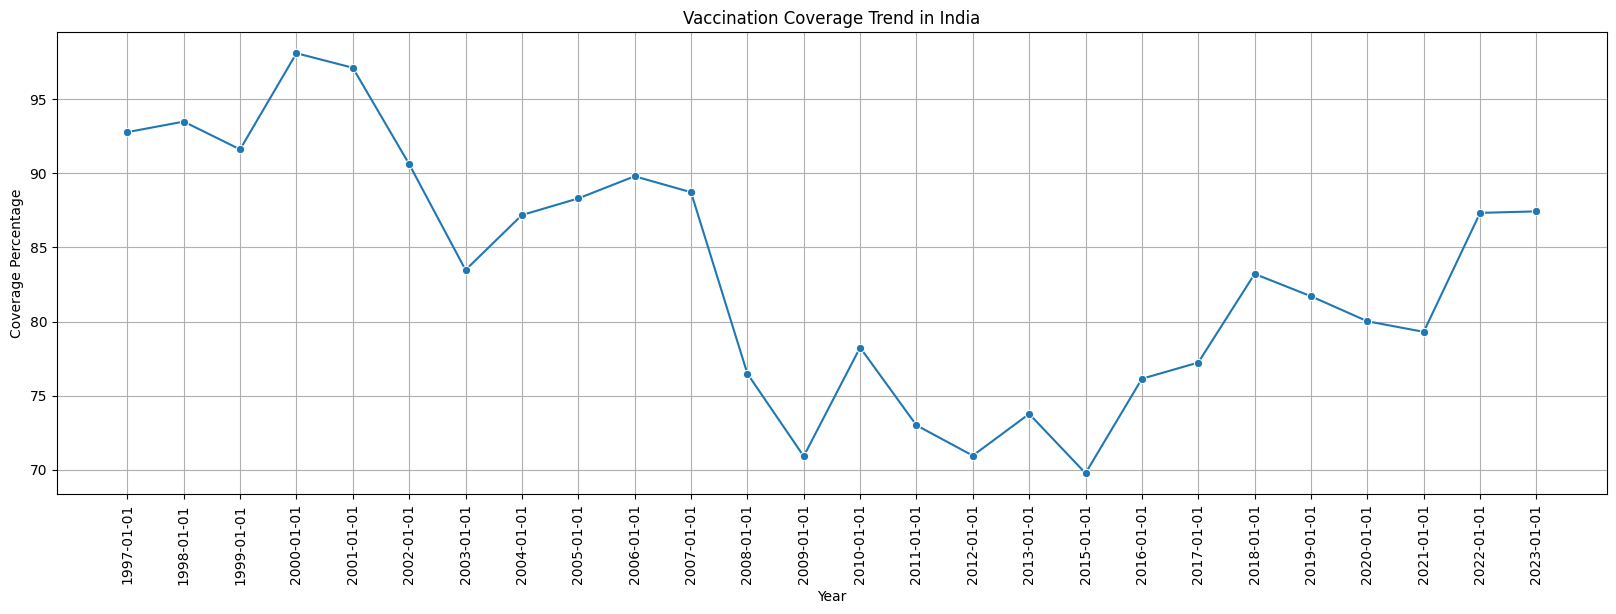

In [12]:
# Plot Coverage Trend Over Time for India
plt.figure(figsize=(20, 6))
india_coverage = coverage_trend[coverage_trend['NAME'] == 'India']
sns.lineplot(data=india_coverage, x='YEAR', y='COVERAGE', marker='o')
plt.xticks(rotation=90)
plt.title("Vaccination Coverage Trend in India")
plt.xlabel("Year")
plt.ylabel("Coverage Percentage")
plt.grid(True)
plt.show()

In [13]:
#Average Coverage by Year and Country
reported_cases_country=reported_cases_data.groupby(['YEAR','NAME'])['CASES'].sum().reset_index()
reported_cases_country

,YEAR,NAME,CASES
0,1980-01-01,Afghanistan,52656.0
1,1980-01-01,African Region,1642381.0
2,1980-01-01,Albania,146.0
3,1980-01-01,Algeria,16555.0
4,1980-01-01,American Samoa,17.0
...,...,...,...
8917,2023-01-01,Western Pacific Region,91346.0
8918,2023-01-01,Yemen,50349.0
8919,2023-01-01,Zambia,7872.0
8920,2023-01-01,Zimbabwe,5850.0


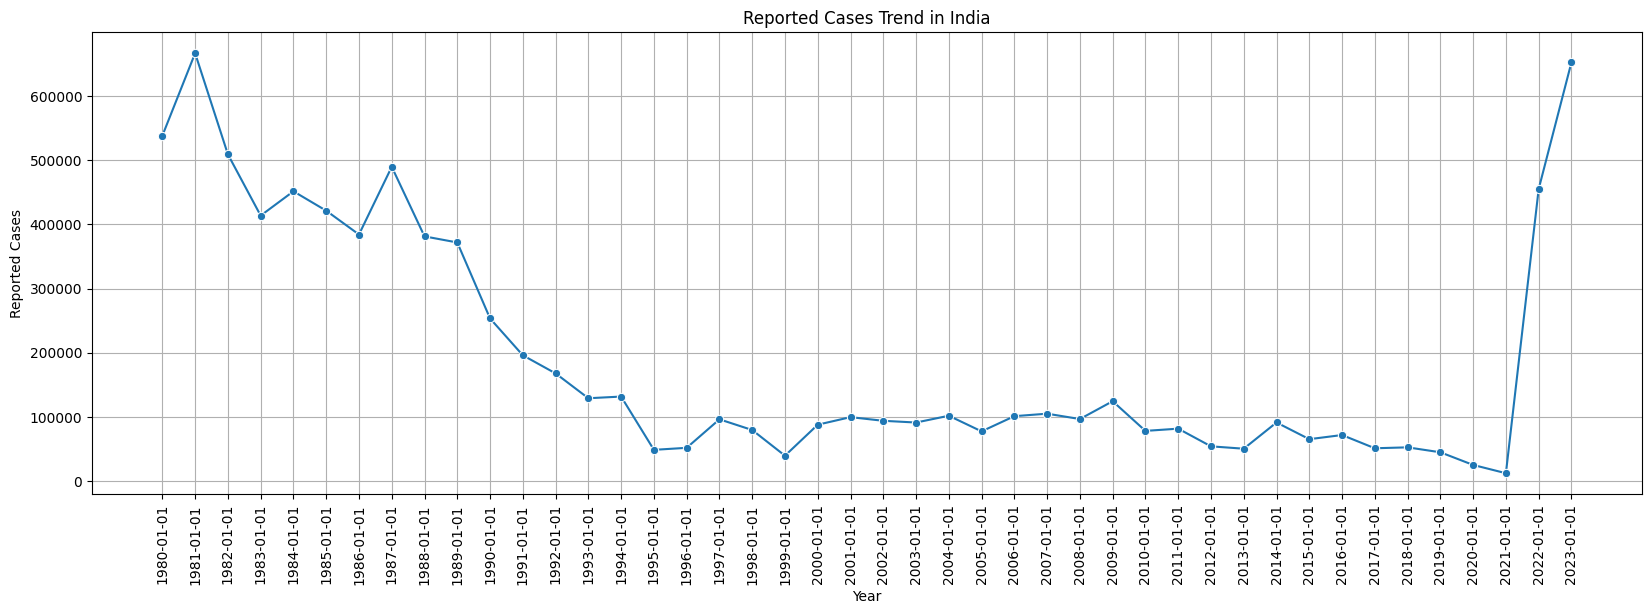

In [15]:
# Plot Reported cases Trend Over Time for India
plt.figure(figsize=(20, 6))
india_reported_cases = reported_cases_country[reported_cases_country['NAME'] == 'India']
sns.lineplot(data=india_reported_cases, x='YEAR', y='CASES', marker='o')
plt.xticks(rotation=90)
plt.title("Reported Cases Trend in India")
plt.xlabel("Year")
plt.ylabel("Reported Cases")
plt.grid(True)
plt.show()

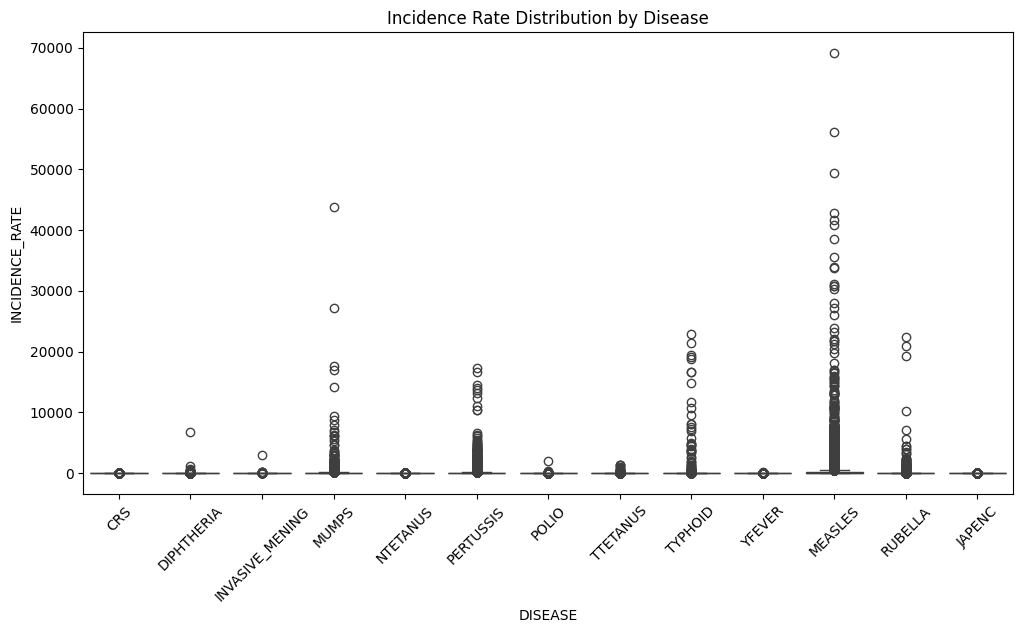

In [16]:
#Disease Incidence Rate Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(data=incidence_rate_data, x='DISEASE', y='INCIDENCE_RATE')
plt.xticks(rotation=45)
plt.title("Incidence Rate Distribution by Disease")
plt.show()

In [17]:
#Higest reported cases by country
top_cases = reported_cases_data.groupby('NAME')['CASES'].sum().nlargest(5).reset_index()
top_cases

,NAME,CASES
0,Global,97587219.0
1,African Region,33752091.0
2,Western Pacific Region,22541307.0
3,European Region,15853904.0
4,China,15411329.0


C:\Users\saisenthur\AppData\Local\Temp\ipykernel_19808\7246104.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cases, x='CASES', y='NAME', palette='viridis')


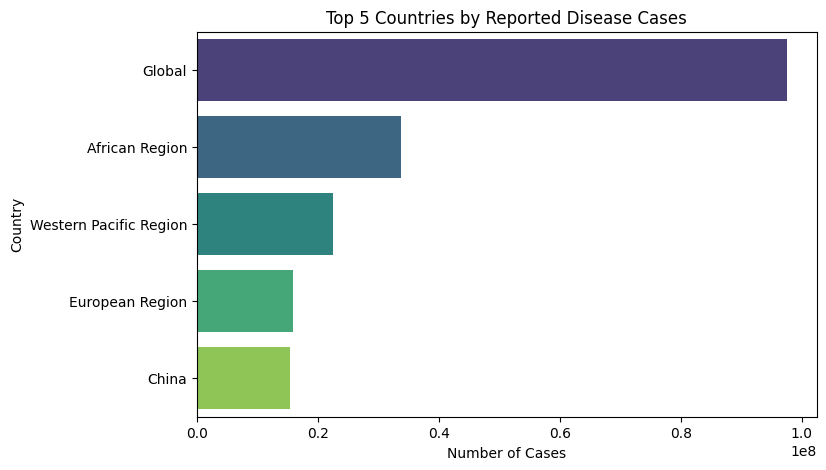

In [18]:
#Plot Country over number of cases
plt.figure(figsize=(8, 5))
sns.barplot(data=top_cases, x='CASES', y='NAME', palette='viridis')
plt.title("Top 5 Countries by Reported Disease Cases")
plt.xlabel("Number of Cases")
plt.ylabel("Country")
plt.show()

In [ ]:
#Number of vaccines introduced in each country by year
vaccine_intro_trend = vaccine_intro_data[vaccine_intro_data['INTRO']=='Yes'].groupby(['YEAR','NAME']).size().reset_index()
vaccine_intro_trend

,YEAR,NAME,0
0,1940-01-01,United States of America,1
1,1941-01-01,United States of America,1
2,1942-01-01,United States of America,1
3,1943-01-01,United States of America,1
4,1944-01-01,United States of America,1
...,...,...,...
6514,2023-01-01,Venezuela (Bolivarian Republic of),10
6515,2023-01-01,Viet Nam,9
6516,2023-01-01,Yemen,8
6517,2023-01-01,Zambia,8


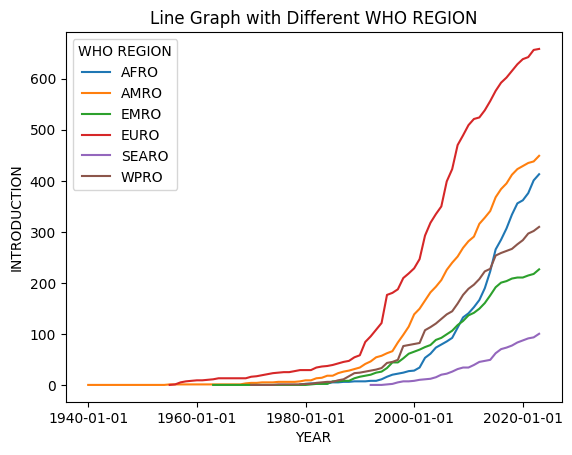

In [ ]:
#m 6
who_rgn = vaccine_intro_data[vaccine_intro_data['INTRO'] == 'Yes'].groupby(['WHO_REGION','YEAR'])[['INTRO']].count().reset_index()

df_pivot = who_rgn.pivot(index='YEAR', columns='WHO_REGION', values='INTRO')
df_pivot

df_pivot.plot(kind='line')

plt.xlabel('YEAR')
plt.ylabel('INTRODUCTION')
plt.title('Line Graph with Different WHO REGION')
plt.legend(title='WHO REGION')
plt.show()

In [20]:
#Reported Cases trend by Disease
reported_cases_disease=reported_cases_data.groupby('DISEASE')['CASES'].sum().reset_index()
reported_cases_disease

,DISEASE,CASES
0,CRS,28650.0
1,DIPHTHERIA,2908251.0
2,INVASIVE_MENING,207198.0
3,JAPENC,225494.0
4,MEASLES,144065673.0
5,MUMPS,36326936.0
6,NTETANUS,1503802.0
7,PERTUSSIS,53089864.0
8,POLIO,1623271.0
9,RUBELLA,16655663.0


In [29]:
correlation = coverage_data.merge(incidence_rate_data, on=['GROUP', 'CODE', 'YEAR'], how='inner')
result = correlation[['COVERAGE', 'INCIDENCE_RATE']].corr()
result

,COVERAGE,INCIDENCE_RATE
COVERAGE,1.000000,-0.006358
INCIDENCE_RATE,-0.006358,1.000000


In [30]:
vaccine_schedule_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8052 entries, 0 to 8051
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CODE                   8052 non-null   object
 1   NAME                   8052 non-null   object
 2   WHO_REGION             8052 non-null   object
 3   YEAR                   8052 non-null   object
 4   VACCINECODE            8052 non-null   object
 5   VACCINE_DESCRIPTION    8052 non-null   object
 6   SCHEDULEROUNDS         8052 non-null   int64 
 7   TARGETPOP              3795 non-null   object
 8   TARGETPOP_DESCRIPTION  8052 non-null   object
 9   GEOAREA                8022 non-null   object
 10  AGEADMINISTERED        7007 non-null   object
 11  SOURCECOMMENT          5139 non-null   object
dtypes: int64(1), object(11)
memory usage: 755.0+ KB


In [41]:
#Dropoff counts:
counts = vaccine_schedule_data['SCHEDULEROUNDS'].value_counts()
first_counts = counts[1] 
print('First dose counts', first_counts)
print('More than 1 dose counts' ,8052-first_counts)
print(3849/8052*100,"%")

First dose counts 3849
More than 1 dose counts 4203
47.80178837555887 %


In [46]:
vaccine_schedule_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8052 entries, 0 to 8051
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CODE                   8052 non-null   object
 1   NAME                   8052 non-null   object
 2   WHO_REGION             8052 non-null   object
 3   YEAR                   8052 non-null   object
 4   VACCINECODE            8052 non-null   object
 5   VACCINE_DESCRIPTION    8052 non-null   object
 6   SCHEDULEROUNDS         8052 non-null   int64 
 7   TARGETPOP              3795 non-null   object
 8   TARGETPOP_DESCRIPTION  8052 non-null   object
 9   GEOAREA                8022 non-null   object
 10  AGEADMINISTERED        7007 non-null   object
 11  SOURCECOMMENT          5139 non-null   object
dtypes: int64(1), object(11)
memory usage: 755.0+ KB


In [49]:
vaccine_schedule_data_booster= vaccine_schedule_data[vaccine_schedule_data['SCHEDULEROUNDS']>1]
vaccine_schedule_data_booster.groupby(['YEAR'])['SCHEDULEROUNDS'].count().reset_index()

,YEAR,SCHEDULEROUNDS
0,2019-01-01,56
1,2021-01-01,12
2,2022-01-01,21
3,2023-01-01,4114


In [45]:
#5
vaccine_schedule_data.groupby(['GEOAREA'])['SCHEDULEROUNDS'].count()

GEOAREA
NATIONAL       7788
SUBNATIONAL     234
Name: SCHEDULEROUNDS, dtype: int64

In [53]:
merged_data_1 = pd.merge(coverage_data, incidence_rate_data, on=['YEAR', 'NAME', 'CODE'], suffixes=('_coverage', '_incidence'))
merged_data_1

,GROUP_coverage,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE,Coverage Growth,GROUP_incidence,DISEASE,DISEASE_DESCRIPTION,DENOMINATOR,INCIDENCE_RATE
0,COUNTRIES,ABW,Aruba,2023-01-01,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.517241,NaN,COUNTRIES,CRS,Congenital rubella syndrome,"per 10,000 live births",0.0
1,COUNTRIES,ABW,Aruba,2023-01-01,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.517241,NaN,COUNTRIES,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",0.0
2,COUNTRIES,ABW,Aruba,2023-01-01,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.517241,NaN,COUNTRIES,INVASIVE_MENING,Invasive meningococcal disease,"per 1,000,000 total population",9.3
3,COUNTRIES,ABW,Aruba,2023-01-01,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.517241,NaN,COUNTRIES,MUMPS,Mumps,"per 1,000,000 total population",0.0
4,COUNTRIES,ABW,Aruba,2023-01-01,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.517241,NaN,COUNTRIES,NTETANUS,Neonatal tetanus,"per 1,000 live births",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549084,WHO_REGIONS,WPR,Western Pacific Region,1980-01-01,RCV1,"Rubella-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588.0,40245.0,0.144043,-96.896139,WHO_REGIONS,DIPHTHERIA,Diphtheria,"per 1,000,000 total population",11.8
549085,WHO_REGIONS,WPR,Western Pacific Region,1980-01-01,RCV1,"Rubella-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588.0,40245.0,0.144043,-96.896139,WHO_REGIONS,MEASLES,Measles,"per 1,000,000 total population",1040.7
549086,WHO_REGIONS,WPR,Western Pacific Region,1980-01-01,RCV1,"Rubella-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588.0,40245.0,0.144043,-96.896139,WHO_REGIONS,NTETANUS,Neonatal tetanus,per 1000 live births,0.7
549087,WHO_REGIONS,WPR,Western Pacific Region,1980-01-01,RCV1,"Rubella-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588.0,40245.0,0.144043,-96.896139,WHO_REGIONS,PERTUSSIS,Pertussis,"per 1,000,000 total population",643.6


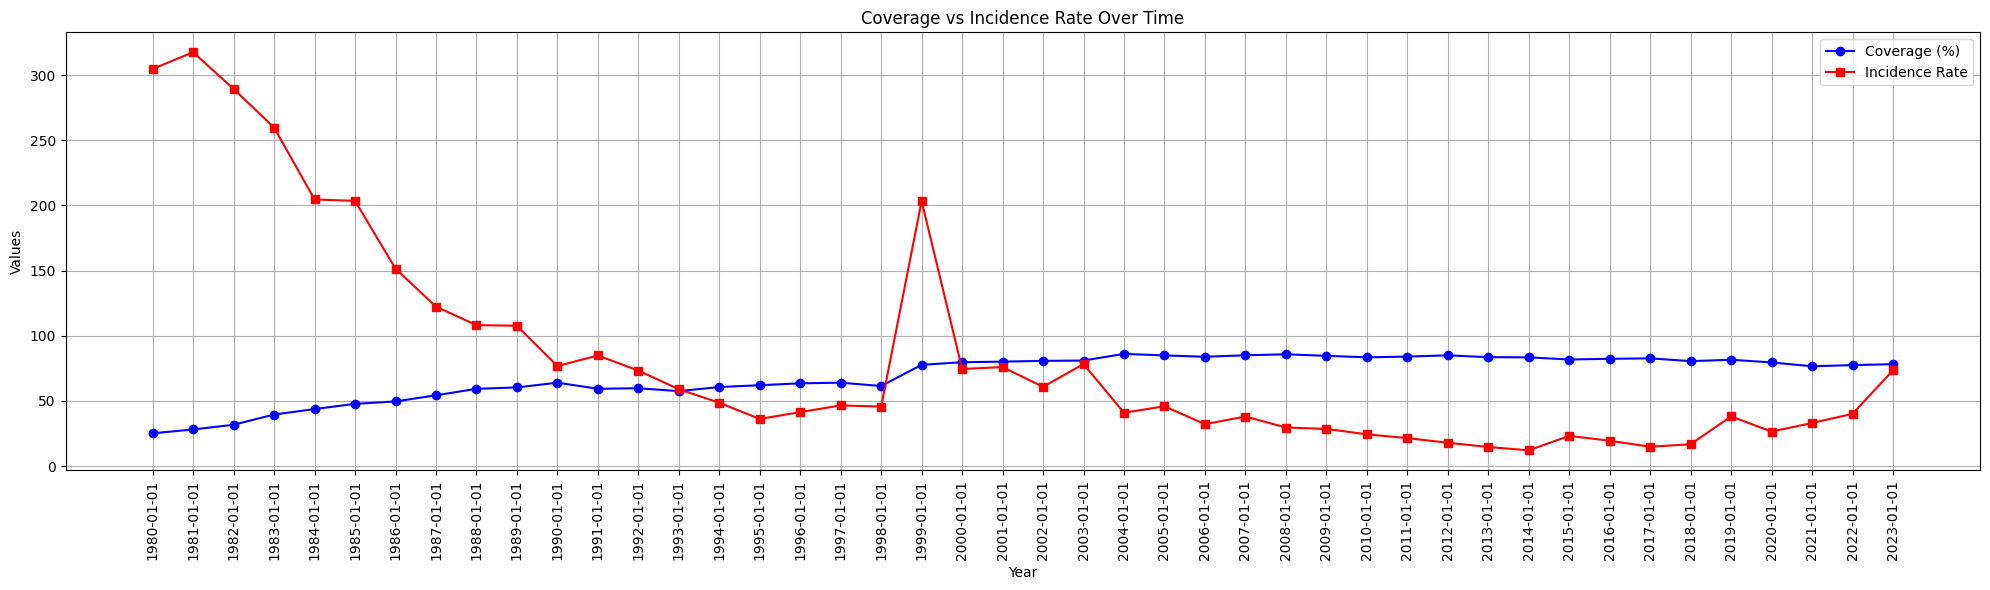

In [70]:
#1
comp=merged_data_1.groupby('YEAR')[['COVERAGE','INCIDENCE_RATE']].mean().reset_index()

plt.figure(figsize=(20, 6))
plt.plot(comp['YEAR'], comp['COVERAGE'], label='Coverage (%)', color='blue', marker='o')
plt.plot(comp['YEAR'], comp['INCIDENCE_RATE'], label='Incidence Rate', color='red', marker='s')
plt.xticks(rotation=90)
# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Coverage vs Incidence Rate Over Time')
plt.legend()  # Show legend
plt.grid(True)  # Optional: Add gridlines for better readability

# Display the plot
plt.tight_layout()
plt.show()

In [67]:
#9
high=merged_data_1.groupby('NAME')[['COVERAGE','INCIDENCE_RATE']].mean().reset_index()
high.sort_values(by='INCIDENCE_RATE', ascending=False)

,NAME,COVERAGE,INCIDENCE_RATE
6,Angola,67.227147,715.816564
178,South Sudan,68.625524,348.786598
196,Tuvalu,94.380977,328.506454
163,Samoa,72.760842,325.312794
55,Democratic Republic of the Congo,81.716038,321.561970
...,...,...,...
126,Montserrat,98.320072,0.000000
145,Palau,83.581672,0.000000
141,Northern Mariana Islands,80.848973,0.000000
160,Saint Kitts and Nevis,92.793578,0.000000


In [55]:
merged_data_1['COVERAGE'].max()

np.float64(6100.0)

In [57]:
merged_data_1['INCIDENCE_RATE'].max()

np.float64(43863.6)

In [51]:
#
merged_data_2 = pd.merge(coverage_data, reported_cases_data, on=['YEAR', 'NAME', 'CODE'], suffixes=('_coverage', '_reported'))
merged_data_2

,GROUP_coverage,CODE,NAME,YEAR,ANTIGEN,ANTIGEN_DESCRIPTION,COVERAGE_CATEGORY,COVERAGE_CATEGORY_DESCRIPTION,TARGET_NUMBER,DOSES,COVERAGE,Coverage Growth,GROUP_reported,DISEASE,DISEASE_DESCRIPTION,CASES
0,COUNTRIES,ABW,Aruba,2023-01-01,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.517241,NaN,COUNTRIES,CRS,Congenital rubella syndrome,0.0
1,COUNTRIES,ABW,Aruba,2023-01-01,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.517241,NaN,COUNTRIES,DIPHTHERIA,Diphtheria,0.0
2,COUNTRIES,ABW,Aruba,2023-01-01,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.517241,NaN,COUNTRIES,INVASIVE_MENING,Invasive meningococcal disease,1.0
3,COUNTRIES,ABW,Aruba,2023-01-01,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.517241,NaN,COUNTRIES,MUMPS,Mumps,0.0
4,COUNTRIES,ABW,Aruba,2023-01-01,DIPHCV4,"Diphtheria-containing vaccine, 4th dose (1st b...",ADMIN,Administrative coverage,1044.0,945.0,90.517241,NaN,COUNTRIES,NTETANUS,Neonatal tetanus,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550854,WHO_REGIONS,WPR,Western Pacific Region,1980-01-01,RCV1,"Rubella-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588.0,40245.0,0.144043,-96.896139,WHO_REGIONS,MEASLES,Measles,1319640.0
550855,WHO_REGIONS,WPR,Western Pacific Region,1980-01-01,RCV1,"Rubella-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588.0,40245.0,0.144043,-96.896139,WHO_REGIONS,NTETANUS,Neonatal tetanus,1572.0
550856,WHO_REGIONS,WPR,Western Pacific Region,1980-01-01,RCV1,"Rubella-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588.0,40245.0,0.144043,-96.896139,WHO_REGIONS,PERTUSSIS,Pertussis,829173.0
550857,WHO_REGIONS,WPR,Western Pacific Region,1980-01-01,RCV1,"Rubella-containing vaccine, 1st dose",WUENIC,WHO/UNICEF Estimates of National Immunization ...,27939588.0,40245.0,0.144043,-96.896139,WHO_REGIONS,POLIO,Poliomyelitis,11420.0


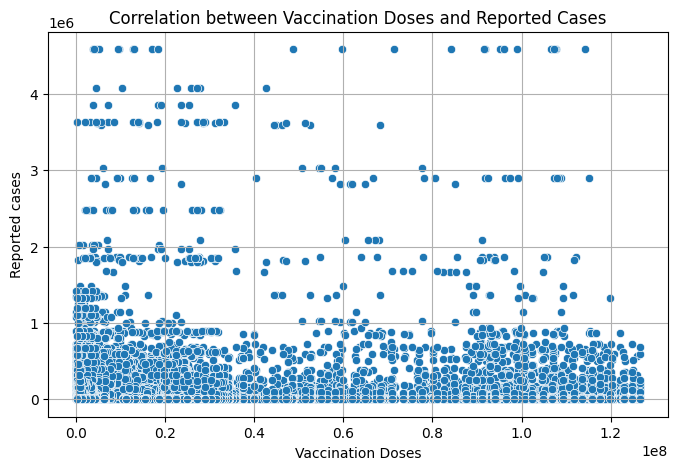

In [52]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_data_2, x='DOSES', y='CASES')
plt.title("Correlation between Vaccination Doses and Reported Cases")
plt.xlabel("Vaccination Doses")
plt.ylabel("Reported cases")
plt.grid(True)
plt.show()

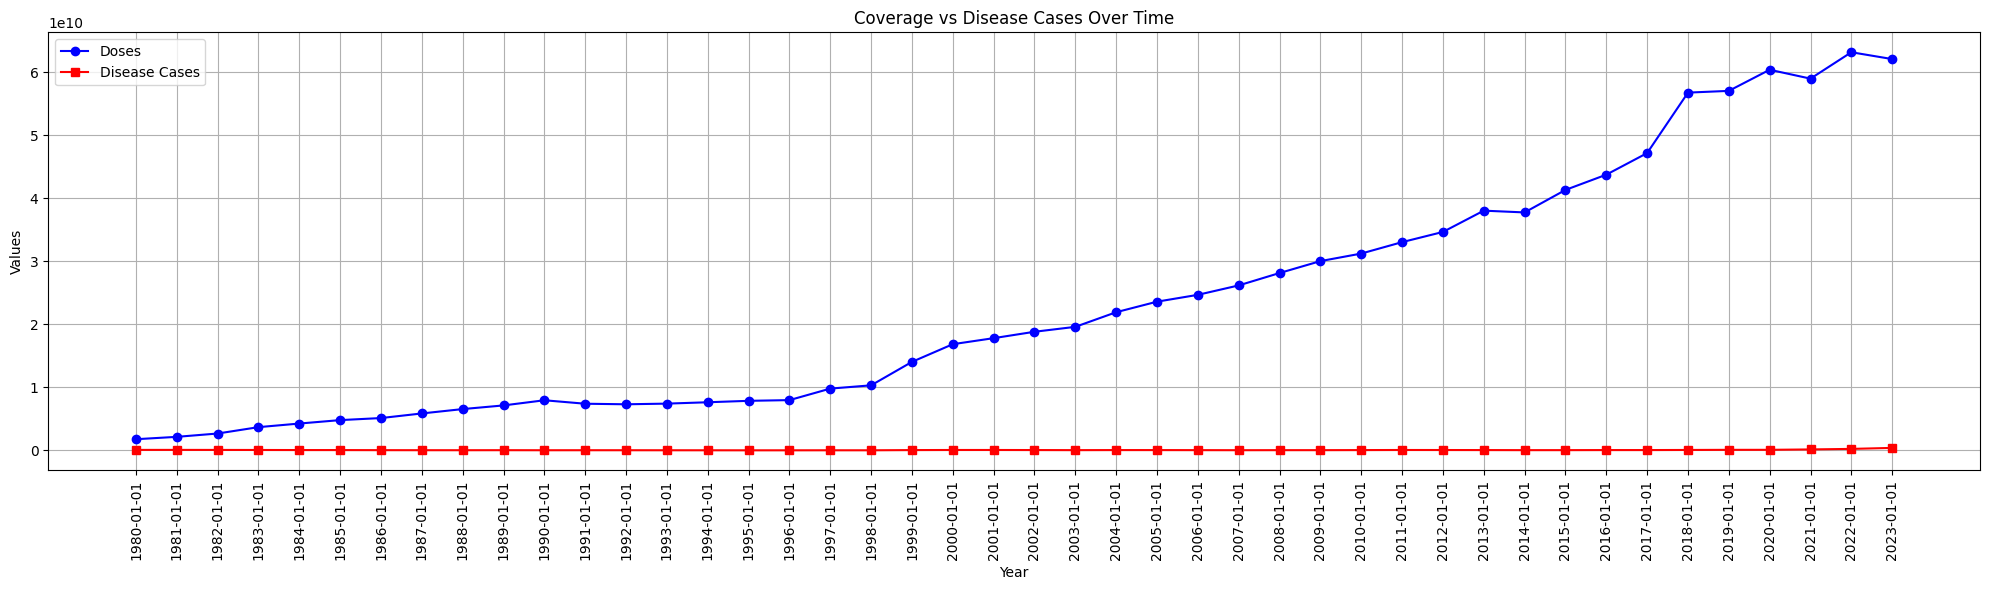

In [74]:
comp2=merged_data_2.groupby('YEAR')[['DOSES','CASES']].sum().reset_index()

plt.figure(figsize=(20, 6))
plt.plot(comp2['YEAR'], comp2['DOSES'], label='Doses', color='blue', marker='o')
plt.plot(comp2['YEAR'], comp2['CASES'], label='Disease Cases', color='red', marker='s')
plt.xticks(rotation=90)
# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Coverage vs Disease Cases Over Time')
plt.legend()  # Show legend
plt.grid(True)  # Optional: Add gridlines for better readability

# Display the plot
plt.tight_layout()
plt.show()

In [79]:
merged_data_3 = pd.merge(vaccine_intro_data, reported_cases_data, on=['YEAR', 'NAME', 'CODE'], how='inner')
merged_data_3

,CODE,NAME,WHO_REGION,YEAR,DESCRIPTION,INTRO,GROUP,DISEASE,DISEASE_DESCRIPTION,CASES
0,AFG,Afghanistan,EMRO,2023-01-01,aP (acellular pertussis) vaccine,No,COUNTRIES,CRS,Congenital rubella syndrome,594.0
1,AFG,Afghanistan,EMRO,2023-01-01,aP (acellular pertussis) vaccine,No,COUNTRIES,DIPHTHERIA,Diphtheria,61.0
2,AFG,Afghanistan,EMRO,2023-01-01,aP (acellular pertussis) vaccine,No,COUNTRIES,MEASLES,Measles,2792.0
3,AFG,Afghanistan,EMRO,2023-01-01,aP (acellular pertussis) vaccine,No,COUNTRIES,NTETANUS,Neonatal tetanus,31.0
4,AFG,Afghanistan,EMRO,2023-01-01,aP (acellular pertussis) vaccine,No,COUNTRIES,PERTUSSIS,Pertussis,1531.0
...,...,...,...,...,...,...,...,...,...,...
929431,ZWE,Zimbabwe,AFRO,1980-01-01,YF (Yellow fever) vaccine,No,COUNTRIES,MEASLES,Measles,23650.0
929432,ZWE,Zimbabwe,AFRO,1980-01-01,YF (Yellow fever) vaccine,No,COUNTRIES,NTETANUS,Neonatal tetanus,134.0
929433,ZWE,Zimbabwe,AFRO,1980-01-01,YF (Yellow fever) vaccine,No,COUNTRIES,PERTUSSIS,Pertussis,6290.0
929434,ZWE,Zimbabwe,AFRO,1980-01-01,YF (Yellow fever) vaccine,No,COUNTRIES,POLIO,Poliomyelitis,32.0


In [89]:
#comp3 = merged_data_3[merged_data_3['INTRO']=='Yes'].groupby(['YEAR'])[['INTRO','CASES']].size().reset_index()
comp3 = (
    merged_data_3[merged_data_3['INTRO'] == 'Yes']
    .groupby('YEAR')
    .agg({'INTRO': 'count', 'CASES': 'sum'})
    .reset_index()
    .rename(columns={'INTRO': 'Count of Yes in INTRO', 'CASES': 'Sum of Cases'})
)

comp3

,YEAR,Count of Yes in INTRO,Sum of Cases
0,1980-01-01,246,859169.0
1,1981-01-01,266,802007.0
2,1982-01-01,339,1053448.0
3,1983-01-01,360,1301546.0
4,1984-01-01,398,805699.0
5,1985-01-01,455,1041746.0
6,1986-01-01,517,1460850.0
7,1987-01-01,564,831162.0
8,1988-01-01,626,900129.0
9,1989-01-01,759,876924.0


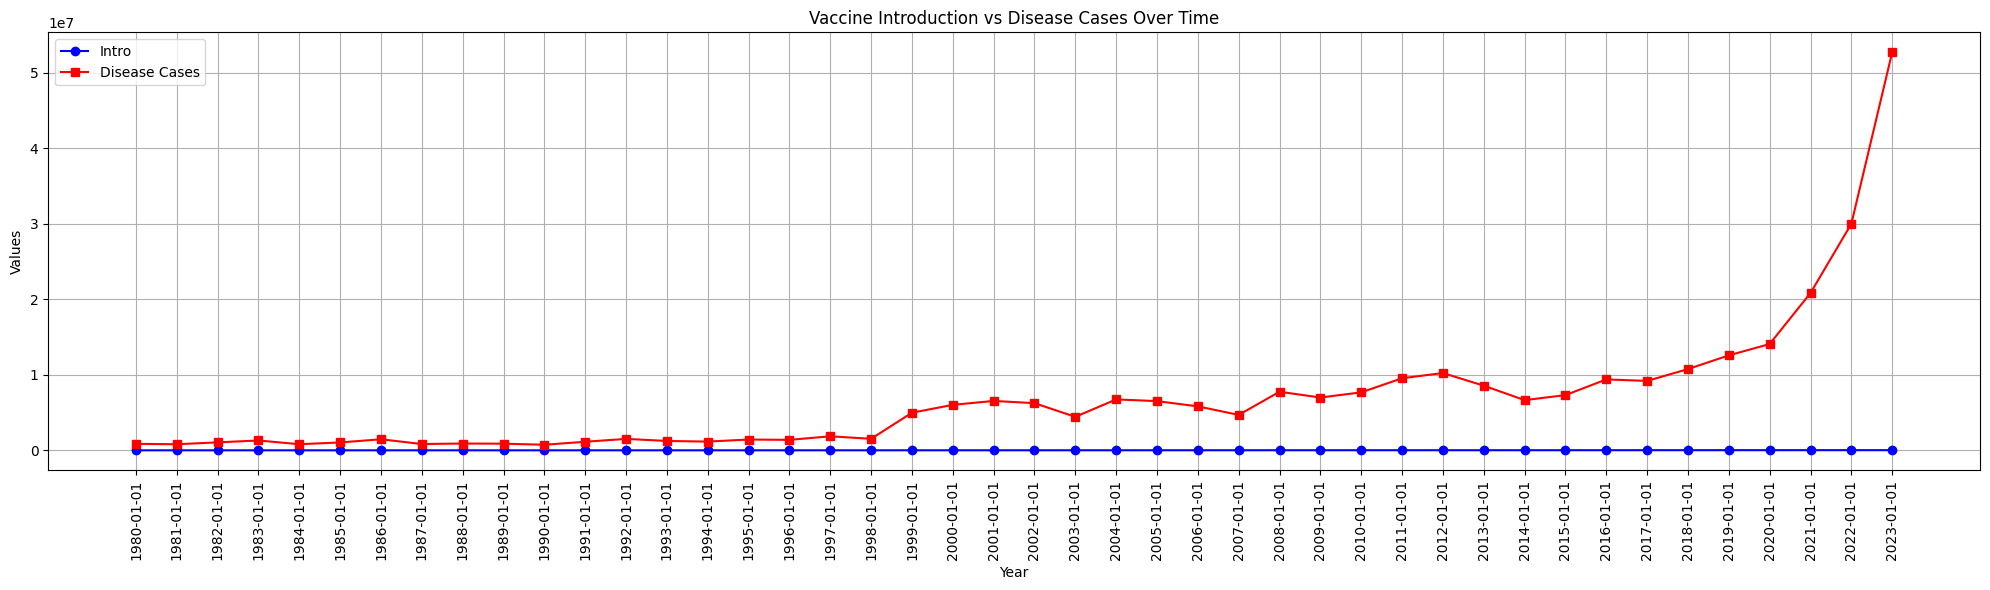

In [87]:
plt.figure(figsize=(20, 6))
plt.plot(comp3['YEAR'], comp3['Count of Yes in INTRO'], label='Intro', color='blue', marker='o')
plt.plot(comp3['YEAR'], comp3['Sum of Cases'], label='Disease Cases', color='red', marker='s')
plt.xticks(rotation=90)
# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Vaccine Introduction vs Disease Cases Over Time')
plt.legend()  # Show legend
plt.grid(True)  # Optional: Add gridlines for better readability

# Display the plot
plt.tight_layout()
plt.show()

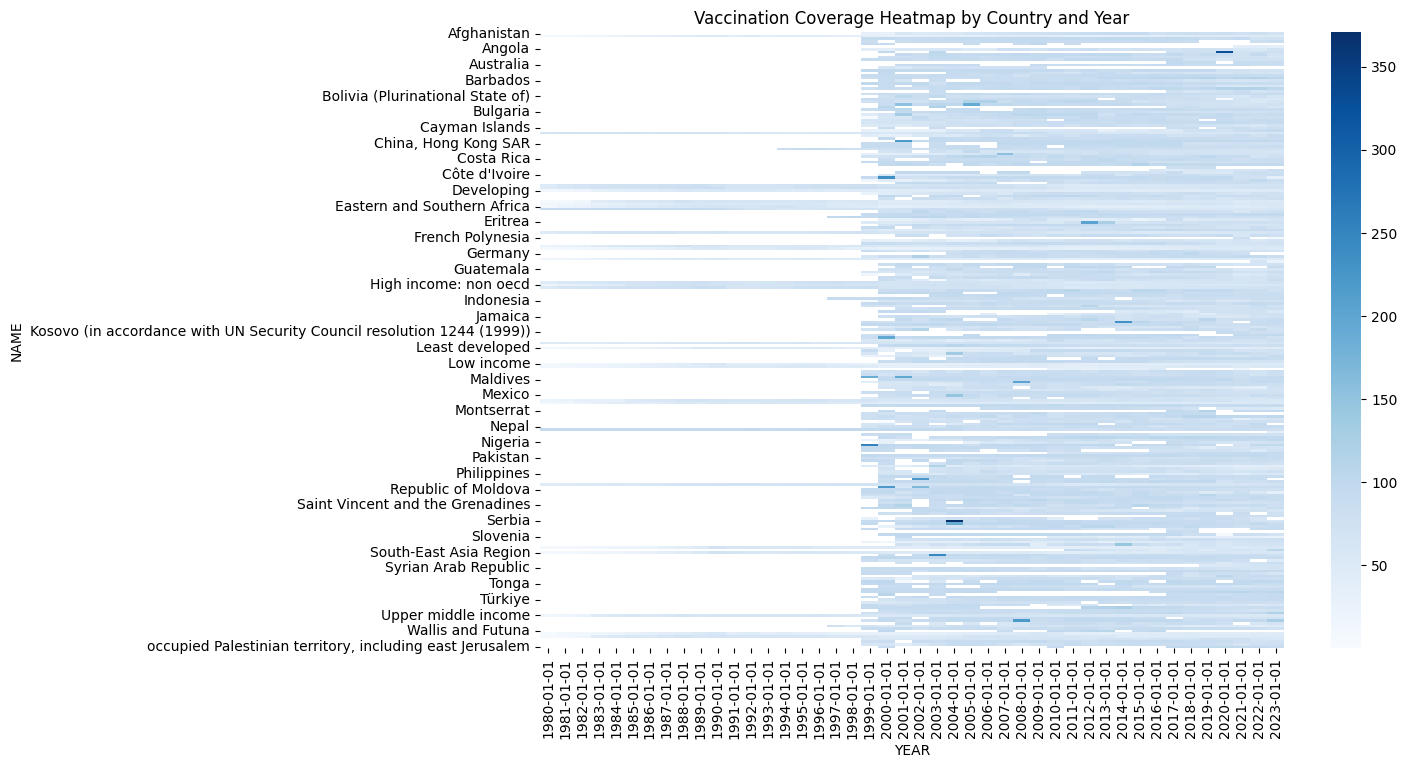

In [23]:
# Pivot table for heatmap
pivot_table = coverage_data.pivot_table(values='COVERAGE', index='NAME', columns='YEAR')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='Blues', annot=False)
plt.title("Vaccination Coverage Heatmap by Country and Year")
plt.show()

In [24]:
coverage_data['Coverage Growth'] = coverage_data.groupby('NAME')['COVERAGE'].pct_change() * 100
coverage_data[['NAME', 'YEAR', 'Coverage Growth']].dropna()

,NAME,YEAR,Coverage Growth
1,Aruba,2023-01-01,-8.646432
2,Aruba,2023-01-01,0.420140
3,Aruba,2023-01-01,18.005304
4,Aruba,2023-01-01,-2.051836
5,Aruba,2023-01-01,-1.212789
...,...,...,...
72187,Western Pacific Region,1980-01-01,-29.799994
72188,Western Pacific Region,1980-01-01,-46.818364
72189,Western Pacific Region,1980-01-01,42.066615
72190,Western Pacific Region,1980-01-01,-24.511286


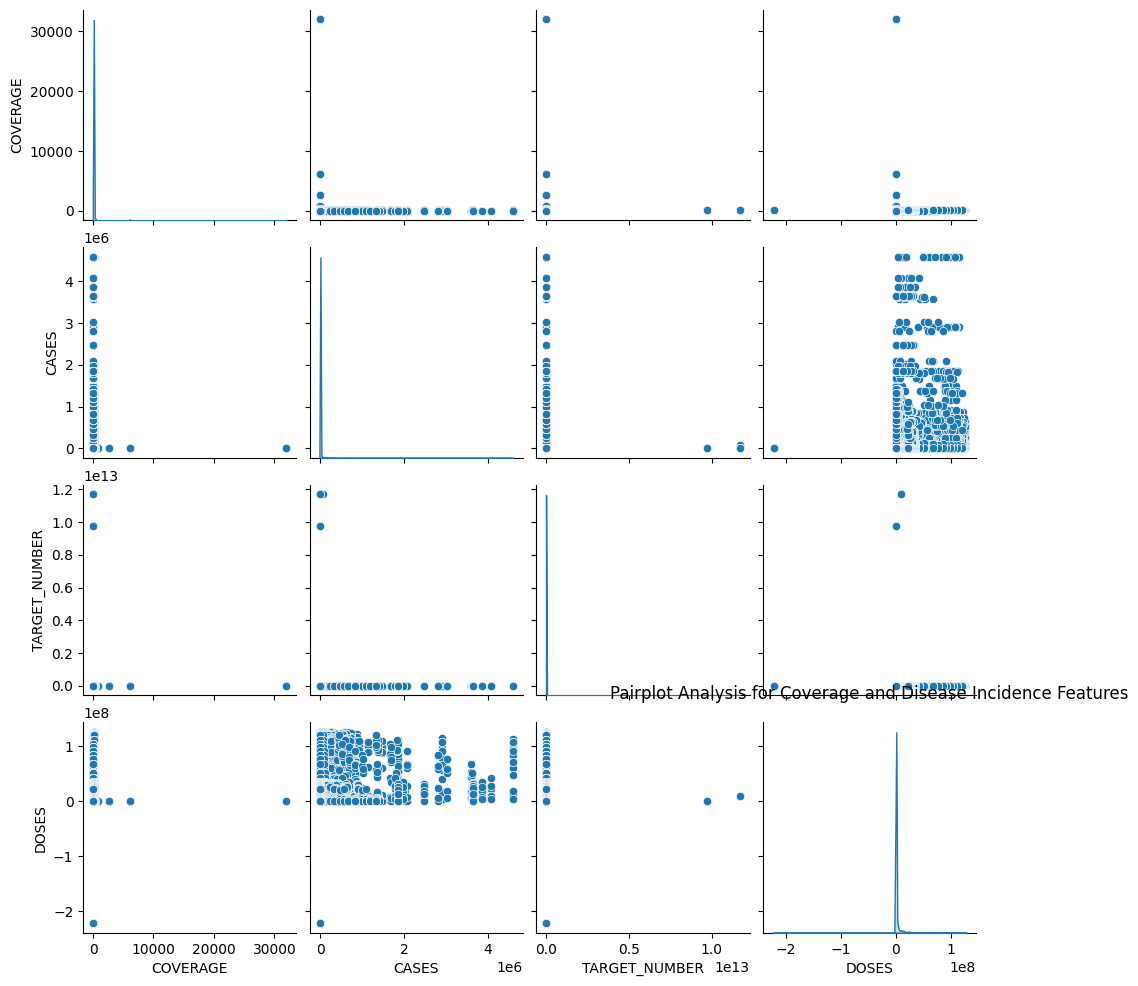

In [52]:
sns.pairplot(merged_data[['COVERAGE', 'CASES', 'TARGET_NUMBER', 'DOSES']], diag_kind='kde')
plt.title("Pairplot Analysis for Coverage and Disease Incidence Features")
plt.show()

C:\Users\saisenthur\AppData\Local\Temp\ipykernel_19808\1196417282.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=vaccine_intro_data, x='WHO_REGION', palette='Set2')


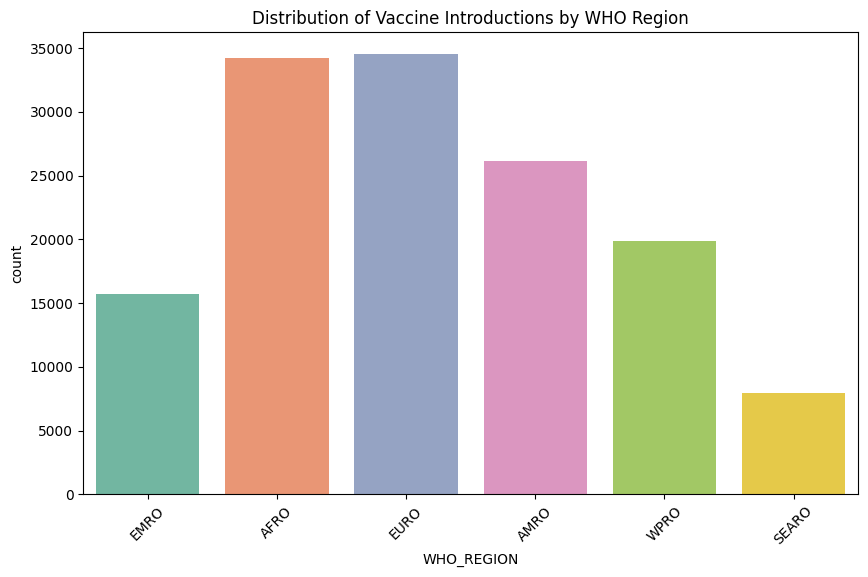

In [25]:
#Distribution of Vaccine Introductions by WHO Region
plt.figure(figsize=(10, 6))
sns.countplot(data=vaccine_intro_data, x='WHO_REGION', palette='Set2')
plt.title("Distribution of Vaccine Introductions by WHO Region")
plt.xticks(rotation=45)
plt.show()

Top 10 Countries with Largest Coverage Drop:
              NAME     COVERAGE
7        Anguilla  6098.630137
27         Brazil  1029.274875
133          Mali  1028.007445
116    Kyrgyzstan   982.988218
187    Seychelles   977.166385
110        Jordan   970.721984
186        Serbia   969.451101
224    Uzbekistan   965.538961
170      Portugal   959.805753
195  South Africa   948.325200


C:\Users\saisenthur\AppData\Local\Temp\ipykernel_19808\3342992930.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_drop, x='COVERAGE', y='NAME', palette='coolwarm')


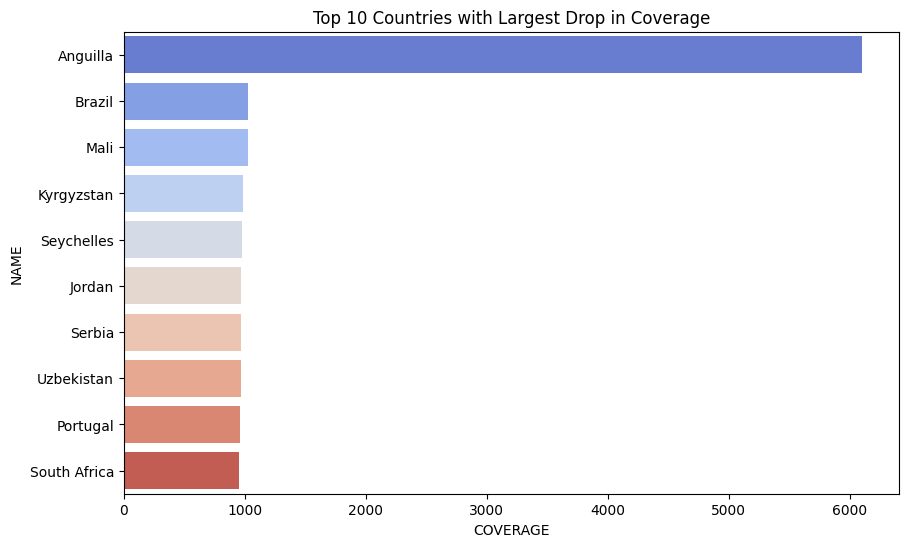

In [26]:
coverage_drop = coverage_data.groupby('NAME')['COVERAGE'].agg(lambda x: x.max() - x.min()).reset_index()
top_10_drop = coverage_drop.nlargest(10, 'COVERAGE')

print("Top 10 Countries with Largest Coverage Drop:\n", top_10_drop)

# Plot the coverage drop
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_drop, x='COVERAGE', y='NAME', palette='coolwarm')
plt.title("Top 10 Countries with Largest Drop in Coverage")
plt.show()